In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.3f}'.format)

import os
try:
    if run_once == False:
        pass
    else:
        print("os.chdir('..') already run once -- will not run again")
except:
    run_once = True
    os.chdir("..")

In [3]:
accidents_df = pd.read_csv("data/accidents/ny_accidents_cleaned2.csv")
weather_df = pd.read_csv("data/weather/nyc_weather_cleaned3.csv")

/var/folders/qh/zp3sqlm15lj3hm8lhm_7340h0000gp/T/ipykernel_14969/4079324071.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  accidents_df = pd.read_csv("data/accidents/ny_accidents_cleaned2.csv")


In [136]:
accidents_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989069 entries, 0 to 1989068
Data columns (total 30 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   CRASH DATE                     object 
 1   CRASH TIME                     object 
 2   BOROUGH                        object 
 3   ZIP CODE                       object 
 4   LATITUDE                       float64
 5   LONGITUDE                      float64
 6   LOCATION                       object 
 7   ON STREET NAME                 object 
 8   CROSS STREET NAME              object 
 9   OFF STREET NAME                object 
 10  NUMBER OF PERSONS INJURED      int64  
 11  NUMBER OF PERSONS KILLED       int64  
 12  NUMBER OF PEDESTRIANS INJURED  int64  
 13  NUMBER OF PEDESTRIANS KILLED   int64  
 14  NUMBER OF CYCLIST INJURED      int64  
 15  NUMBER OF CYCLIST KILLED       int64  
 16  NUMBER OF MOTORIST INJURED     int64  
 17  NUMBER OF MOTORIST KILLED      int64  
 18  CO

In [137]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110340 entries, 0 to 110339
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   date                 110340 non-null  object 
 1   time                 110340 non-null  object 
 2   temp                 110340 non-null  float64
 3   visibility           110340 non-null  float64
 4   feels_like           110340 non-null  float64
 5   temp_min             110340 non-null  float64
 6   temp_max             110340 non-null  float64
 7   wind_speed           110340 non-null  float64
 8   wind_gust            110340 non-null  float64
 9   rain_1h              110340 non-null  float64
 10  rain_3h              110340 non-null  float64
 11  snow_1h              110340 non-null  float64
 12  snow_3h              110340 non-null  float64
 13  clouds_all           110340 non-null  int64  
 14  weather_id           110340 non-null  int64  
 15  weather_main     

In [4]:
accidents_df.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,NUMBER OF VEHICLES INVOLVED
0,2023-11-01,1:29,BROOKLYN,11230.000,-73.970,40.622,"(-73.96975, 40.62181)",OCEAN PARKWAY,AVENUE K,NaN,1,0,0,0,0,0,1,0,Unspecified,Unspecified,Unspecified,NaN,NaN,4675373,Moped,Sedan,Sedan,NaN,NaN,3
1,2021-09-11,9:35,BROOKLYN,11208.000,40.667,-73.867,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,0,0,0,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN,1
2,2021-12-14,8:13,BROOKLYN,11233.000,-73.917,40.683,"(-73.91726, 40.68332)",SARATOGA AVENUE,DECATUR STREET,NaN,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN,0
3,2021-12-14,17:05,NaN,NaN,40.709,-73.957,"(40.709183, -73.956825)",BROOKLYN QUEENS EXPRESSWAY,NaN,NaN,0,0,0,0,0,0,0,0,Passing Too Closely,Unspecified,NaN,NaN,NaN,4486555,Sedan,Tractor Truck Diesel,NaN,NaN,NaN,2
4,2021-12-14,8:17,BRONX,10475.000,40.868,-73.831,"(40.86816, -73.83148)",NaN,NaN,344 BAYCHESTER AVENUE,2,0,0,0,0,0,2,0,Unspecified,Unspecified,NaN,NaN,NaN,4486660,Sedan,Sedan,NaN,NaN,NaN,2


In [ ]:
pd.set_option("fl")

In [113]:
weather_df.head()

,date,time,temp,visibility,feels_like,temp_min,temp_max,wind_speed,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,visibility_category,rain_1h_category,rain_3h_category,snow_1h_category,snow_3h_category,wind_intensity
0,2012-12-31,19:00,3.060,10000.000,-2.600,2.710,3.250,8.740,12.850,0.000,0.000,0.000,0.000,100,804,Clouds,overcast clouds,High,No Rain,No Rain,No Snow,No Snow,Moderate Wind
1,2012-12-31,20:00,3.070,10000.000,-1.840,3.010,3.930,6.680,11.820,0.000,0.000,0.000,0.000,100,804,Clouds,overcast clouds,High,No Rain,No Rain,No Snow,No Snow,Moderate Wind
2,2012-12-31,21:00,3.070,10000.000,-1.840,3.010,3.930,6.680,9.770,0.000,0.000,0.000,0.000,100,804,Clouds,overcast clouds,High,No Rain,No Rain,No Snow,No Snow,Moderate Wind
3,2012-12-31,22:00,3.380,10000.000,-1.830,3.150,4.350,7.710,12.850,0.000,0.000,0.000,0.000,100,804,Clouds,overcast clouds,High,No Rain,No Rain,No Snow,No Snow,Moderate Wind
4,2012-12-31,23:00,3.380,10000.000,-2.010,3.150,4.350,8.220,12.850,0.000,0.000,0.000,0.000,100,804,Clouds,overcast clouds,High,No Rain,No Rain,No Snow,No Snow,Moderate Wind


In [139]:
# Since weather_df's time column is bucketed into 1-hour intervals, we need to round the accident times to the nearest hour
accidents_df["CRASH HOUR"] = pd.to_datetime(accidents_df["CRASH TIME"], format="%H:%M").dt.round("h").dt.strftime("%H:%M")
accidents_df.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,NUMBER OF VEHICLES INVOLVED,CRASH HOUR
0,2023-11-01,1:29,BROOKLYN,11230.000,-73.970,40.622,"(-73.96975, 40.62181)",OCEAN PARKWAY,AVENUE K,NaN,1,0,0,0,0,0,1,0,Unspecified,Unspecified,Unspecified,NaN,NaN,4675373,Moped,Sedan,Sedan,NaN,NaN,3,01:00
1,2021-09-11,9:35,BROOKLYN,11208.000,40.667,-73.867,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,0,0,0,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN,1,10:00
2,2021-12-14,8:13,BROOKLYN,11233.000,-73.917,40.683,"(-73.91726, 40.68332)",SARATOGA AVENUE,DECATUR STREET,NaN,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN,0,08:00
3,2021-12-14,17:05,NaN,NaN,40.709,-73.957,"(40.709183, -73.956825)",BROOKLYN QUEENS EXPRESSWAY,NaN,NaN,0,0,0,0,0,0,0,0,Passing Too Closely,Unspecified,NaN,NaN,NaN,4486555,Sedan,Tractor Truck Diesel,NaN,NaN,NaN,2,17:00
4,2021-12-14,8:17,BRONX,10475.000,40.868,-73.831,"(40.86816, -73.83148)",NaN,NaN,344 BAYCHESTER AVENUE,2,0,0,0,0,0,2,0,Unspecified,Unspecified,NaN,NaN,NaN,4486660,Sedan,Sedan,NaN,NaN,NaN,2,08:00


In [140]:
# We'd also like to pad the weather df's time with leading zeros to match the accident df's time format
weather_df["time"] = weather_df["time"].str.zfill(5)
weather_df['time'].value_counts()

time
19:00    4599
20:00    4598
17:00    4598
16:00    4598
15:00    4598
14:00    4598
13:00    4598
12:00    4598
11:00    4598
10:00    4598
09:00    4598
08:00    4598
07:00    4598
06:00    4598
05:00    4598
04:00    4598
03:00    4598
01:00    4598
00:00    4598
23:00    4598
22:00    4598
21:00    4598
18:00    4598
02:00    4585
Name: count, dtype: int64

In [141]:
# Now, we can merge the two DataFrames on the date and time columns

# We join them based on the "CRASH DATE" and "CRASH HOUR" from accidents_df and "date" and "time" from weather_df
merged_df = pd.merge(left=accidents_df, right=weather_df, left_on=["CRASH DATE", "CRASH HOUR"], right_on=["date", "time"], how="left")
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989069 entries, 0 to 1989068
Data columns (total 54 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   CRASH DATE                     object 
 1   CRASH TIME                     object 
 2   BOROUGH                        object 
 3   ZIP CODE                       object 
 4   LATITUDE                       float64
 5   LONGITUDE                      float64
 6   LOCATION                       object 
 7   ON STREET NAME                 object 
 8   CROSS STREET NAME              object 
 9   OFF STREET NAME                object 
 10  NUMBER OF PERSONS INJURED      int64  
 11  NUMBER OF PERSONS KILLED       int64  
 12  NUMBER OF PEDESTRIANS INJURED  int64  
 13  NUMBER OF PEDESTRIANS KILLED   int64  
 14  NUMBER OF CYCLIST INJURED      int64  
 15  NUMBER OF CYCLIST KILLED       int64  
 16  NUMBER OF MOTORIST INJURED     int64  
 17  NUMBER OF MOTORIST KILLED      int64  
 18  CO

In [142]:
merged_df.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,NUMBER OF VEHICLES INVOLVED,CRASH HOUR,date,time,temp,visibility,feels_like,temp_min,temp_max,wind_speed,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,visibility_category,rain_1h_category,rain_3h_category,snow_1h_category,snow_3h_category,wind_intensity
0,2023-11-01,1:29,BROOKLYN,11230.000,-73.970,40.622,"(-73.96975, 40.62181)",OCEAN PARKWAY,AVENUE K,NaN,1,0,0,0,0,0,1,0,Unspecified,Unspecified,Unspecified,NaN,NaN,4675373,Moped,Sedan,Sedan,NaN,NaN,3,01:00,2023-11-01,01:00,9.110,10000.000,7.390,8.150,9.930,3.090,4.829,0.110,0.000,0.000,0.000,100.000,500.000,Rain,light rain,High,Light Rain,No Rain,No Snow,No Snow,Light Wind
1,2021-09-11,9:35,BROOKLYN,11208.000,40.667,-73.867,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,0,0,0,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN,1,10:00,2021-09-11,10:00,21.840,10000.000,21.490,19.930,23.270,3.090,4.829,0.000,0.000,0.000,0.000,0.000,800.000,Clear,sky is clear,High,No Rain,No Rain,No Snow,No Snow,Light Wind
2,2021-12-14,8:13,BROOKLYN,11233.000,-73.917,40.683,"(-73.91726, 40.68332)",SARATOGA AVENUE,DECATUR STREET,NaN,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN,0,08:00,2021-12-14,08:00,8.170,10000.000,5.040,7.160,8.930,5.660,8.845,0.000,0.000,0.000,0.000,0.000,800.000,Clear,sky is clear,High,No Rain,No Rain,No Snow,No Snow,Moderate Wind
3,2021-12-14,17:05,NaN,NaN,40.709,-73.957,"(40.709183, -73.956825)",BROOKLYN QUEENS EXPRESSWAY,NaN,NaN,0,0,0,0,0,0,0,0,Passing Too Closely,Unspecified,NaN,NaN,NaN,4486555,Sedan,Tractor Truck Diesel,NaN,NaN,NaN,2,17:00,2021-12-14,17:00,10.300,10000.000,8.010,9.480,11.190,4.020,5.360,0.000,0.000,0.000,0.000,0.000,800.000,Clear,sky is clear,High,No Rain,No Rain,No Snow,No Snow,Light Wind
4,2021-12-14,8:17,BRONX,10475.000,40.868,-73.831,"(40.86816, -73.83148)",NaN,NaN,344 BAYCHESTER AVENUE,2,0,0,0,0,0,2,0,Unspecified,Unspecified,NaN,NaN,NaN,4486660,Sedan,Sedan,NaN,NaN,NaN,2,08:00,2021-12-14,08:00,8.170,10000.000,5.040,7.160,8.930,5.660,8.845,0.000,0.000,0.000,0.000,0.000,800.000,Clear,sky is clear,High,No Rain,No Rain,No Snow,No Snow,Moderate Wind


In [143]:
# We can drop some columns that might not be useful for our purposes (or that are redundant)
merged_df = merged_df.drop(columns=["date", 
                                    "time", 
                                    "LOCATION",
                                    "OFF STREET NAME",
                                    "NUMBER OF PEDESTRIANS INJURED", 
                                    "NUMBER OF PEDESTRIANS KILLED", 
                                    "NUMBER OF CYCLIST INJURED", 
                                    "NUMBER OF CYCLIST KILLED", 
                                    "NUMBER OF MOTORIST INJURED",
                                    "NUMBER OF MOTORIST KILLED",
                                    "CONTRIBUTING FACTOR VEHICLE 1",
                                    "CONTRIBUTING FACTOR VEHICLE 2",
                                    "CONTRIBUTING FACTOR VEHICLE 3",
                                    "CONTRIBUTING FACTOR VEHICLE 4",
                                    "CONTRIBUTING FACTOR VEHICLE 5",
                                    "VEHICLE TYPE CODE 1",
                                    "VEHICLE TYPE CODE 2",
                                    "VEHICLE TYPE CODE 3",
                                    "VEHICLE TYPE CODE 4",
                                    "VEHICLE TYPE CODE 5",
                                    "CRASH HOUR"])

In [144]:
merged_df.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,ON STREET NAME,CROSS STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,COLLISION_ID,NUMBER OF VEHICLES INVOLVED,temp,visibility,feels_like,temp_min,temp_max,wind_speed,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,visibility_category,rain_1h_category,rain_3h_category,snow_1h_category,snow_3h_category,wind_intensity
0,2023-11-01,1:29,BROOKLYN,11230.000,-73.970,40.622,OCEAN PARKWAY,AVENUE K,1,0,4675373,3,9.110,10000.000,7.390,8.150,9.930,3.090,4.829,0.110,0.000,0.000,0.000,100.000,500.000,Rain,light rain,High,Light Rain,No Rain,No Snow,No Snow,Light Wind
1,2021-09-11,9:35,BROOKLYN,11208.000,40.667,-73.867,NaN,NaN,0,0,4456314,1,21.840,10000.000,21.490,19.930,23.270,3.090,4.829,0.000,0.000,0.000,0.000,0.000,800.000,Clear,sky is clear,High,No Rain,No Rain,No Snow,No Snow,Light Wind
2,2021-12-14,8:13,BROOKLYN,11233.000,-73.917,40.683,SARATOGA AVENUE,DECATUR STREET,0,0,4486609,0,8.170,10000.000,5.040,7.160,8.930,5.660,8.845,0.000,0.000,0.000,0.000,0.000,800.000,Clear,sky is clear,High,No Rain,No Rain,No Snow,No Snow,Moderate Wind
3,2021-12-14,17:05,NaN,NaN,40.709,-73.957,BROOKLYN QUEENS EXPRESSWAY,NaN,0,0,4486555,2,10.300,10000.000,8.010,9.480,11.190,4.020,5.360,0.000,0.000,0.000,0.000,0.000,800.000,Clear,sky is clear,High,No Rain,No Rain,No Snow,No Snow,Light Wind
4,2021-12-14,8:17,BRONX,10475.000,40.868,-73.831,NaN,NaN,2,0,4486660,2,8.170,10000.000,5.040,7.160,8.930,5.660,8.845,0.000,0.000,0.000,0.000,0.000,800.000,Clear,sky is clear,High,No Rain,No Rain,No Snow,No Snow,Moderate Wind


In [145]:
# Let's also rename the columns to snake-case for consistency
merged_df.columns = merged_df.columns.str.lower().str.replace(" ", "_")
merged_df.columns

Index(['crash_date', 'crash_time', 'borough', 'zip_code', 'latitude',
       'longitude', 'on_street_name', 'cross_street_name',
       'number_of_persons_injured', 'number_of_persons_killed', 'collision_id',
       'number_of_vehicles_involved', 'temp', 'visibility', 'feels_like',
       'temp_min', 'temp_max', 'wind_speed', 'wind_gust', 'rain_1h', 'rain_3h',
       'snow_1h', 'snow_3h', 'clouds_all', 'weather_id', 'weather_main',
       'weather_description', 'visibility_category', 'rain_1h_category',
       'rain_3h_category', 'snow_1h_category', 'snow_3h_category',
       'wind_intensity'],
      dtype='object')

In [146]:
merged_df.head()

,crash_date,crash_time,borough,zip_code,latitude,longitude,on_street_name,cross_street_name,number_of_persons_injured,number_of_persons_killed,collision_id,number_of_vehicles_involved,temp,visibility,feels_like,temp_min,temp_max,wind_speed,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,visibility_category,rain_1h_category,rain_3h_category,snow_1h_category,snow_3h_category,wind_intensity
0,2023-11-01,1:29,BROOKLYN,11230.000,-73.970,40.622,OCEAN PARKWAY,AVENUE K,1,0,4675373,3,9.110,10000.000,7.390,8.150,9.930,3.090,4.829,0.110,0.000,0.000,0.000,100.000,500.000,Rain,light rain,High,Light Rain,No Rain,No Snow,No Snow,Light Wind
1,2021-09-11,9:35,BROOKLYN,11208.000,40.667,-73.867,NaN,NaN,0,0,4456314,1,21.840,10000.000,21.490,19.930,23.270,3.090,4.829,0.000,0.000,0.000,0.000,0.000,800.000,Clear,sky is clear,High,No Rain,No Rain,No Snow,No Snow,Light Wind
2,2021-12-14,8:13,BROOKLYN,11233.000,-73.917,40.683,SARATOGA AVENUE,DECATUR STREET,0,0,4486609,0,8.170,10000.000,5.040,7.160,8.930,5.660,8.845,0.000,0.000,0.000,0.000,0.000,800.000,Clear,sky is clear,High,No Rain,No Rain,No Snow,No Snow,Moderate Wind
3,2021-12-14,17:05,NaN,NaN,40.709,-73.957,BROOKLYN QUEENS EXPRESSWAY,NaN,0,0,4486555,2,10.300,10000.000,8.010,9.480,11.190,4.020,5.360,0.000,0.000,0.000,0.000,0.000,800.000,Clear,sky is clear,High,No Rain,No Rain,No Snow,No Snow,Light Wind
4,2021-12-14,8:17,BRONX,10475.000,40.868,-73.831,NaN,NaN,2,0,4486660,2,8.170,10000.000,5.040,7.160,8.930,5.660,8.845,0.000,0.000,0.000,0.000,0.000,800.000,Clear,sky is clear,High,No Rain,No Rain,No Snow,No Snow,Moderate Wind


In [149]:
# Let's save our progress

merged_df.to_csv("data/merged.csv", index=False)

Now let's observe any distributional differences in the weather conditions where accidents have occurred vs overall weather conditions.

In [155]:
weather_columns = ["wind_gust", "rain_1h", "rain_3h", "snow_1h", "snow_3h", 
                   "wind_intensity", "rain_1h_category", "rain_3h_category", 
                   "snow_1h_category", "snow_3h_category", "visibility_category"]

pd.set_option('display.float_format', '{:.3f}'.format)
merged_df[weather_columns].describe()
merged_df["rain_1h_category"].value_counts()

rain_1h_category
No Rain          1574523
Light Rain        297789
Moderate Rain      29290
Heavy Rain          1741
Name: count, dtype: int64

In [156]:
weather_df[weather_columns].describe()

,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h
count,110340.000,110340.000,110340.000,110340.000,110340.000
mean,8.115,0.158,0.063,0.008,0.004
std,3.931,0.823,0.900,0.116,0.134
min,0.000,0.000,0.000,0.000,0.000
25%,5.594,0.000,0.000,0.000,0.000
50%,7.600,0.000,0.000,0.000,0.000
75%,10.439,0.000,0.000,0.000,0.000
max,35.473,36.580,132.080,5.800,10.800


We can find that there are some increases in wind, rain, and snow means between the accidents weather and overall weather data.

Let's make some statistical tests

In [157]:
weather_df.columns

Index(['date', 'time', 'temp', 'visibility', 'feels_like', 'temp_min',
       'temp_max', 'wind_speed', 'wind_gust', 'rain_1h', 'rain_3h', 'snow_1h',
       'snow_3h', 'clouds_all', 'weather_id', 'weather_main',
       'weather_description', 'visibility_category', 'rain_1h_category',
       'rain_3h_category', 'snow_1h_category', 'snow_3h_category',
       'wind_intensity'],
      dtype='object')

In [162]:
categorical_columns = ["rain_1h_category", "rain_3h_category", "snow_1h_category", "snow_3h_category", "visibility_category", "wind_intensity"]

for col in categorical_columns:
    print(f"Column: {col}")
    print(weather_df[col].value_counts())
    print()
    print("-" * 50)

Column: rain_1h_category
rain_1h_category
No Rain          92905
Light Rain       15905
Moderate Rain     1430
Heavy Rain         100
Name: count, dtype: int64

--------------------------------------------------
Column: rain_3h_category
rain_3h_category
No Rain          107661
Light Rain         2452
Moderate Rain       210
Heavy Rain           17
Name: count, dtype: int64

--------------------------------------------------
Column: snow_1h_category
snow_1h_category
No Snow          109051
Light Snow         1015
Moderate Snow       255
Heavy Snow           19
Name: count, dtype: int64

--------------------------------------------------
Column: snow_3h_category
snow_3h_category
No Snow          110155
Light Snow          138
Moderate Snow        47
Name: count, dtype: int64

--------------------------------------------------
Column: visibility_category
visibility_category
High      104162
Medium      5701
Low          477
Name: count, dtype: int64

--------------------------------------

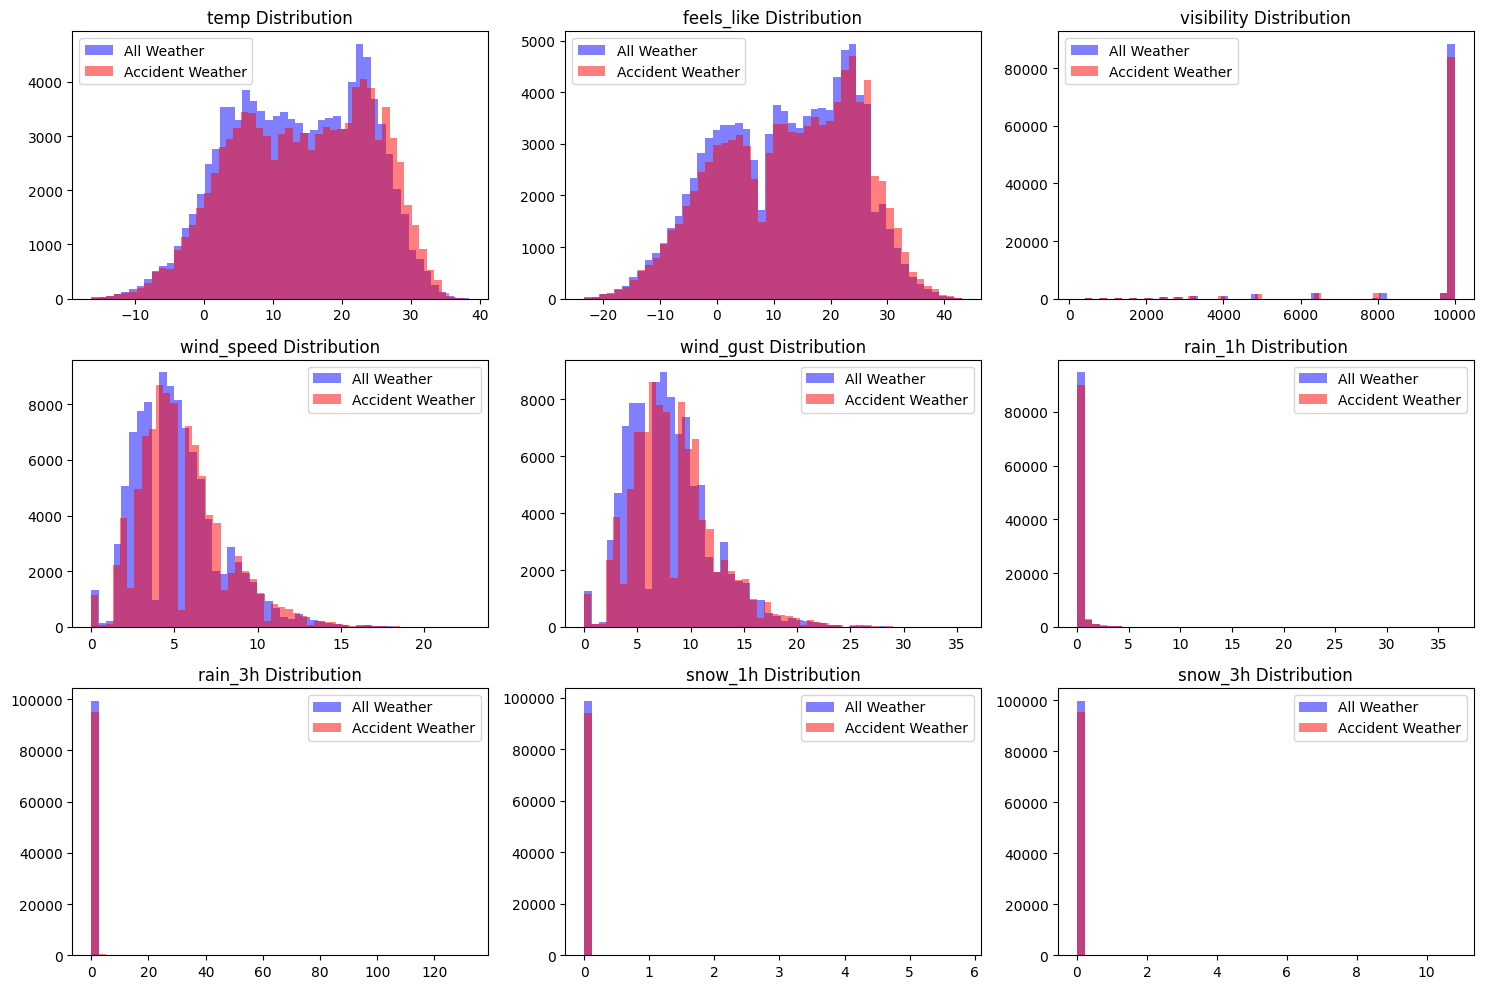

In [79]:
weather_columns = ['temp', 'feels_like', 'visibility', 'wind_speed', 'wind_gust', 'rain_1h', 'rain_3h', 'snow_1h', 'snow_3h']
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,10))

sample_size = 100000

for i, column in enumerate(weather_columns):
    all_weather = weather_df[column].sample(sample_size, random_state=42)
    accident_weather = merged_df[column].sample(sample_size, random_state=42)
    
    row, col = i // 3, i % 3

    axes[row, col].hist(all_weather, bins=50, alpha=0.5, label='All Weather', color='blue')
    axes[row, col].hist(accident_weather, bins=50, alpha=0.5, label='Accident Weather', color='red')
    axes[row, col].set_title(f'{column} Distribution')
    axes[row, col].legend()
    
plt.tight_layout()
plt.show()


In [104]:
def compare_distributions(weather, accidents, weather_columns):
    results = []
    
    for col in weather_columns:
        # Perform various tests
        all_weather = weather[col].dropna()
        accident_weather = accidents[col].dropna()
        
        all_mean = all_weather.mean()
        accident_mean = accident_weather.mean()
        
        ks_stat, ks_pvalue = stats.ks_2samp(all_weather, accident_weather)
        mw_stat, mw_pvalue = stats.mannwhitneyu(all_weather, accident_weather, alternative='two-sided')
        results.append({
            "variable": col,
            "all_weather_mean": all_mean,
            "accident_weather_mean": accident_mean,
            "difference": accident_mean - all_mean,
            "percent_difference": ((accident_mean - all_mean) / all_mean * 100),
            "ks_test_pvalue": ks_pvalue,
            "mw_test_pvalue": mw_pvalue,
            "significance": ks_pvalue < 0.05 or mw_pvalue < 0.05
        })

    return pd.DataFrame(results)
    
comparison_results = compare_distributions(weather_df, merged_df, weather_columns)

In [105]:
pd.set_option('display.float_format', '{:.8f}'.format)
comparison_results

,variable,all_weather_mean,accident_weather_mean,difference,percent_difference,ks_test_pvalue,mw_test_pvalue,significance
0,temp,13.53043212,14.40819926,0.87776714,6.48735485,0.00000000,0.00000000,True
1,feels_like,11.81666621,12.78300674,0.96634052,8.17777624,0.00000000,0.00000000,True
2,visibility,9509.31303245,9465.38746773,-43.92556471,-0.46192153,0.00136034,0.00000000,True
3,wind_speed,5.25105220,5.44322726,0.19217506,3.65974378,0.00000000,0.00000000,True
4,wind_gust,8.11547714,8.43670917,0.32123204,3.95826435,0.00000000,0.00000000,True
5,rain_1h,0.15822113,0.17509933,0.01687819,10.66747071,0.00000000,0.00000000,True
6,rain_3h,0.06317446,0.06946220,0.00628774,9.95297474,0.16753471,0.00000047,True
7,snow_1h,0.00812779,0.01168359,0.00355580,43.74873047,0.30101603,0.00000000,True
8,snow_3h,0.00367056,0.00582290,0.00215233,58.63767334,0.99999084,0.00000000,True


In [166]:
def chi_square_test(weather_df, merged_df, cols):
    results = {}
    for col in cols:
        weather_counts = weather_df[col].sample(50000).value_counts()
        accident_counts = merged_df[col].sample(50000).value_counts()
        
        # Contingency table
        contingency_table = pd.DataFrame({
            f"All {col} Instances": weather_counts,
            f"Accident {col} Instances": accident_counts
        })
        
        print(f"Contingency Table for {col}:\n{contingency_table}\n")
        print('-' * 50)
        
        # Chi2 test
        chi2, pvalue, dof, expected = stats.chi2_contingency(contingency_table.values)
        
        print(f"Chi2 Statistic: {chi2:.4f}")
        print(f"P-Value: {pvalue:.6f}")
        print(f"Degrees of Freedom: {dof}")
        print(f"Expected Frequencies:\n{expected}\n")
        
        print('='* 80)
        
        results[col] = {
            "Chi2 Statistic": chi2,
            "P-Value": pvalue,
            "Degrees of Freedom": dof,
            "Expected Frequencies": expected
        }
    return results

In [167]:
results = chi_square_test(weather_df, merged_df, categorical_columns)

Contingency Table for rain_1h_category:
                  All rain_1h_category Instances  \
rain_1h_category                                   
No Rain                                    42089   
Light Rain                                  7222   
Moderate Rain                                633   
Heavy Rain                                    56   

                  Accident rain_1h_category Instances  
rain_1h_category                                       
No Rain                                         39623  
Light Rain                                       7465  
Moderate Rain                                     737  
Heavy Rain                                         48  

--------------------------------------------------
Chi2 Statistic: 40.7474
P-Value: 0.000000
Degrees of Freedom: 3
Expected Frequencies:
[[41743.89259551 39968.10740449]
 [ 7503.09074004  7183.90925996]
 [  699.88658772   670.11341228]
 [   53.13007673    50.86992327]]

Contingency Table for rain_3h_category:

In [168]:
merged_df.to_csv("data/merged.csv", index=False)